In [8]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#load dataset
data=pd.read_csv('2020-03-09 Coronavirus Tweets.CSV',encoding='ISO-8859-1')
data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,527405,1166,NaN,2010-04-15T06:31:39Z,True,es
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,85,508,NaN,2019-10-21T14:56:27Z,False,zh
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463413,1.237890e+18,2.985614e+08,2020-03-11T23:59:57Z,orourke_darren,A really important read. What weâre measurin...,Twitter for iPhone,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,2469,1231,NaN,2011-05-14T14:48:00Z,False,en
463414,1.237890e+18,2.996935e+08,2020-03-11T23:59:58Z,tvnnoticias,Los casos de COVID-19 se registran mayoritaria...,Twitter Web App,NaN,NaN,NaN,False,...,4,NaN,NaN,NaN,794985,1608,NaN,2011-05-16T14:51:19Z,True,es
463415,1.237890e+18,2.353961e+08,2020-03-11T23:59:58Z,algibson87,Folks upset at the public preparedness measure...,Twitter for iPhone,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,386,815,NaN,2011-01-08T02:34:11Z,False,en
463416,1.237890e+18,1.149145e+08,2020-03-11T23:59:58Z,JPenerangan,Apa itu Virus Coronavirus (Covid-19)?\n\nSumbe...,Twitter Web App,NaN,NaN,NaN,False,...,71,NaN,NaN,NaN,86817,267,NaN,2010-02-17T01:10:37Z,True,in


In [9]:
data.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,527405,1166,NaN,2010-04-15T06:31:39Z,True,es
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,85,508,NaN,2019-10-21T14:56:27Z,False,zh
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en


In [10]:
#preinvestating
data.info

<bound method DataFrame.info of            status_id       user_id            created_at      screen_name  \
0       1.236800e+18  1.331840e+08  2020-03-09T00:00:00Z        EcuadorTV   
1       1.236800e+18  1.186300e+18  2020-03-09T00:00:00Z  DanielAnthonyL2   
2       1.236800e+18  9.779450e+17  2020-03-09T00:00:00Z      deepnews_ai   
3       1.236800e+18  2.700096e+08  2020-03-09T00:00:14Z        kwekwayel   
4       1.236800e+18  8.462100e+17  2020-03-09T00:00:28Z       mystylehfb   
...              ...           ...                   ...              ...   
463413  1.237890e+18  2.985614e+08  2020-03-11T23:59:57Z   orourke_darren   
463414  1.237890e+18  2.996935e+08  2020-03-11T23:59:58Z      tvnnoticias   
463415  1.237890e+18  2.353961e+08  2020-03-11T23:59:58Z       algibson87   
463416  1.237890e+18  1.149145e+08  2020-03-11T23:59:58Z      JPenerangan   
463417  1.237890e+18  9.838350e+17  2020-03-11T23:59:59Z          En_Rezk   

                                           

In [11]:
data.describe

<bound method NDFrame.describe of            status_id       user_id            created_at      screen_name  \
0       1.236800e+18  1.331840e+08  2020-03-09T00:00:00Z        EcuadorTV   
1       1.236800e+18  1.186300e+18  2020-03-09T00:00:00Z  DanielAnthonyL2   
2       1.236800e+18  9.779450e+17  2020-03-09T00:00:00Z      deepnews_ai   
3       1.236800e+18  2.700096e+08  2020-03-09T00:00:14Z        kwekwayel   
4       1.236800e+18  8.462100e+17  2020-03-09T00:00:28Z       mystylehfb   
...              ...           ...                   ...              ...   
463413  1.237890e+18  2.985614e+08  2020-03-11T23:59:57Z   orourke_darren   
463414  1.237890e+18  2.996935e+08  2020-03-11T23:59:58Z      tvnnoticias   
463415  1.237890e+18  2.353961e+08  2020-03-11T23:59:58Z       algibson87   
463416  1.237890e+18  1.149145e+08  2020-03-11T23:59:58Z      JPenerangan   
463417  1.237890e+18  9.838350e+17  2020-03-11T23:59:59Z          En_Rezk   

                                         

In [12]:
data.shape

(463418, 22)

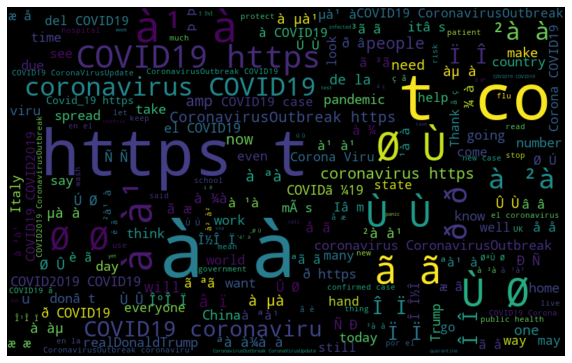

In [13]:
#word cloud before
all_words = ' '.join([text for text in data['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
#preporcessing
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

data['new_text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [15]:
data['new_text2']= data['new_text'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-15-a15813fbbb5f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['new_text2']= data['new_text'].str.replace("[^a-zA-Z#]", " ")


In [16]:
#remove short word
data['new_text3'] = data['new_text2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
#token
tokenized_tweet = data['new_text3'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [ministra, presentan, MinutosConLaSalud, progr...
1    [#CoronavirusOutbreak, #Coronavirus, #China, #...
2    [During, health, scare, like, #CoronavirusOutb...
3    [please, update, reporting, include, false, st...
4    [Germ, Guardian, Pluggable, Purifier, Sanitize...
Name: new_text3, dtype: object

In [18]:
#steamming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [ministra, presentan, minutosconlasalud, progr...
1    [#coronavirusoutbreak, #coronaviru, #china, #w...
2    [dure, health, scare, like, #coronavirusoutbre...
3    [pleas, updat, report, includ, fals, statement...
4    [germ, guardian, pluggabl, purifi, sanit, elim...
Name: new_text3, dtype: object

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['new_text4'] = tokenized_tweet

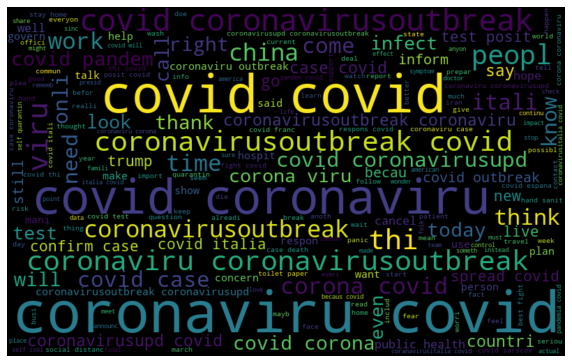

In [20]:
all_words = ' '.join([text for text in data['new_text4']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
import nltk

sid_obj = SentimentIntensityAnalyzer()
data['tag']='                 '
for i in range(len(data['tag'])):
    data['tag'][i] = sid_obj.polarity_scores(data['new_text4'][i])

data.head(10)

<ipython-input-23-43920cf35de4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tag'][i] = sid_obj.polarity_scores(data['new_text4'][i])


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,friends_count,account_lang,account_created_at,verified,lang,new_text,new_text2,new_text3,new_text4,tag
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,1166,NaN,2010-04-15T06:31:39Z,True,es,"HOY | 20H00\n, ministra de y te presentan #6...",HOY H ministra de y te presentan # ...,ministra presentan MinutosConLaSalud programa ...,ministra presentan minutosconlasalud programa ...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp..."
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,508,NaN,2019-10-21T14:56:27Z,False,zh,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,# ...,#CoronavirusOutbreak #Coronavirus #China #Wuha...,#coronavirusoutbreak #coronaviru #china #wuhan...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,835,NaN,2018-03-25T16:28:09Z,False,en,During a health scare like the #CoronavirusOut...,During a health scare like the #CoronavirusOut...,During health scare like #CoronavirusOutbreak ...,dure health scare like #coronavirusoutbreak ne...,"{'neg': 0.096, 'neu': 0.657, 'pos': 0.248, 'co..."
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,624,NaN,2011-03-21T21:03:44Z,False,en,please update reporting to include false stat...,please update reporting to include false stat...,please update reporting include false statemen...,pleas updat report includ fals statement infor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,6332,NaN,2017-03-27T04:00:34Z,False,en,Germ Guardian Pluggable Air Purifier &amp; San...,Germ Guardian Pluggable Air Purifier amp San...,Germ Guardian Pluggable Purifier Sanitizer Eli...,germ guardian pluggabl purifi sanit elimin ger...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,1.236800e+18,1.111290e+18,2020-03-09T00:00:36Z,SaintBrothel,Simple math proves the Chinese government is l...,Twitter for iPhone,NaN,NaN,NaN,True,...,3812,NaN,2019-03-28T15:34:27Z,False,en,Simple math proves the Chinese government is l...,Simple math proves the Chinese government is l...,Simple math proves Chinese government lying wo...,simpl math prove chines govern lie world #covi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,1.236800e+18,9.031460e+17,2020-03-09T00:00:38Z,PatriciaSbd,Es increÃ­ble la incompetencia e irresponsabil...,Twitter for Android,NaN,NaN,NaN,True,...,3576,NaN,2017-08-31T06:44:38Z,False,es,Es increÃ­ble la incompetencia e irresponsabil...,Es incre ble la incompetencia e irresponsabil...,incre incompetencia irresponsabilidad ante cri...,incr incompetencia irresponsabilidad ant crisi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,1.236800e+18,1.222270e+18,2020-03-09T00:00:42Z,BytesCrypto,#CoronavirusOutbreak\nð®ð¹ 7 381\nð«ð·...,Twitter for Android,NaN,NaN,NaN,False,...,157,NaN,2020-01-28T21:40:48Z,False,und,#CoronavirusOutbreak\nð®ð¹ 7 381\nð«ð·...,#CoronavirusOutbreak ...,#CoronavirusOutbreak https KVOvkmwMik,#coronavirusoutbreak http kvovkmwmik,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,1.236800e+18,2.706523e+08,2020-03-09T00:00:42Z,BlackPearl_Inc,Classes were suspended in the following cities...,Twitter Web App,NaN,NaN,NaN,False,...,2832,NaN,2011-03-23T00:50:38Z,False,en,Classes were suspended in the following cities...,Classes were suspended in the following cities...,Classes were suspended following cities towns ...,class were suspend f

In [24]:
data['compound']=0
for i in range(len(data['tag'])):
    data['compound'][i]=data['tag'][i]['compound']

<ipython-input-24-6b1b6f4c993a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound'][i]=data['tag'][i]['compound']


In [25]:
data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,account_lang,account_created_at,verified,lang,new_text,new_text2,new_text3,new_text4,tag,compound
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,NaN,2010-04-15T06:31:39Z,True,es,"HOY | 20H00\n, ministra de y te presentan #6...",HOY H ministra de y te presentan # ...,ministra presentan MinutosConLaSalud programa ...,ministra presentan minutosconlasalud programa ...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,NaN,2019-10-21T14:56:27Z,False,zh,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,# ...,#CoronavirusOutbreak #Coronavirus #China #Wuha...,#coronavirusoutbreak #coronaviru #china #wuhan...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,NaN,2018-03-25T16:28:09Z,False,en,During a health scare like the #CoronavirusOut...,During a health scare like the #CoronavirusOut...,During health scare like #CoronavirusOutbreak ...,dure health scare like #coronavirusoutbreak ne...,"{'neg': 0.096, 'neu': 0.657, 'pos': 0.248, 'co...",0
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,NaN,2011-03-21T21:03:44Z,False,en,please update reporting to include false stat...,please update reporting to include false stat...,please update reporting include false statemen...,pleas updat report includ fals statement infor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,NaN,2017-03-27T04:00:34Z,False,en,Germ Guardian Pluggable Air Purifier &amp; San...,Germ Guardian Pluggable Air Purifier amp San...,Germ Guardian Pluggable Purifier Sanitizer Eli...,germ guardian pluggabl purifi sanit elimin ger...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463413,1.237890e+18,2.985614e+08,2020-03-11T23:59:57Z,orourke_darren,A really important read. What weâre measurin...,Twitter for iPhone,NaN,NaN,NaN,False,...,NaN,2011-05-14T14:48:00Z,False,en,A really important read. What weâre measurin...,A really important read What we re measurin...,really important read What measuring only frac...,realli import read what measur onli fraction w...,"{'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'comp...",0
463414,1.237890e+18,2.996935e+08,2020-03-11T23:59:58Z,tvnnoticias,Los casos de COVID-19 se registran mayoritaria...,Twitter Web App,NaN,NaN,NaN,False,...,NaN,2011-05-16T14:51:19Z,True,es,Los casos de COVID-19 se registran mayoritaria...,Los casos de COVID se registran mayoritaria...,casos COVID registran mayoritariamente capital...,caso covid registran mayoritariament capit pan...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
463415,1.237890e+18,2.353961e+08,2020-03-11T23:59:58Z,algibson87,Folks upset at the public preparedness measure...,Twitter for iPhone,NaN,NaN,NaN,False,...,NaN,2011-01-08T02:34:11Z,False,en,Folks upset at the public preparedness measure...,Folks upset at the public preparedness measure...,Folks upset public preparedness measures #COVI...,folk upset public prepared measur #covid same ...,"{'neg': 0.141, 'neu': 0.584, 'pos': 0.276, 'co...",0
463416,1.237890e+18,1.149145e+08,2020-03-11T23:59:58Z,JPenerangan,Apa itu Virus Coronavirus (Covid-19)?\n\nSumbe...,Twitter Web App,NaN,NaN,NaN,False,...,NaN,2010-02-17T01:10:37Z,True,in,Apa itu Virus Coronavirus (Covid-19)?\n\nSumbe...,Apa i

In [26]:
data['sent']=0
for i in range(len(data['tag'])):
    if data['compound'][i]>0:
        data['sent'][i]='postive'
    elif int(data['compound'][i])<0:
        data['sent'][i]='negative'
    else:
        data['sent'][i]='netural'
        

<ipython-input-26-9cb4e6008816>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sent'][i]='netural'
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
type(data['compound'][0])

numpy.int64

In [28]:
data.sample(10)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,account_created_at,verified,lang,new_text,new_text2,new_text3,new_text4,tag,compound,sent
304570,1.237750e+18,9.724520e+17,2020-03-11T14:20:55Z,Enxxs26,the media should stop putting thriller kind of...,Twitter for Android,NaN,NaN,NaN,False,...,2018-03-10T12:40:08Z,False,en,the media should stop putting thriller kind of...,the media should stop putting thriller kind of...,media should stop putting thriller kind music ...,media should stop put thriller kind music ever...,"{'neg': 0.157, 'neu': 0.5, 'pos': 0.343, 'comp...",0,netural
300516,1.237740e+18,3.013894e+09,2020-03-11T14:02:14Z,thereviewsarein,#COVID19 has caused the cancellation/postponem...,Twitter Web App,NaN,NaN,NaN,False,...,2015-02-09T01:22:22Z,False,en,#COVID19 has caused the cancellation/postponem...,#COVID has caused the cancellation postponem...,#COVID caused cancellation postponement tour m...,#covid caus cancel postpon tour more real situ...,"{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'comp...",0,netural
286098,1.237720e+18,8.370540e+17,2020-03-11T12:51:27Z,derek_zth,"Dai Bergamo, #molamia !!!\n#Berghem #NeverGive...",Twitter Web App,NaN,NaN,NaN,False,...,2017-03-01T21:36:30Z,False,it,"Dai Bergamo, #molamia !!!\n#Berghem #NeverGive...",Dai Bergamo #molamia #Berghem #NeverGiveU...,Bergamo #molamia #Berghem #NeverGiveUp #COVID ...,bergamo #molamia #berghem #nevergiveup #covid ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,netural
265879,1.237690e+18,5.532805e+08,2020-03-11T10:45:02Z,psgfirman,#jubir khusus #covid19 cocok. Ngemong nya teg...,Twitter Web App,NaN,NaN,NaN,False,...,2012-04-14T03:05:09Z,False,in,#jubir khusus #covid19 cocok. Ngemong nya teg...,#jubir khusus #covid cocok Ngemong nya teg...,#jubir khusus #covid cocok Ngemong tegas #jubu...,#jubir khusu #covid cocok ngemong tega #juburk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,netural
385783,1.237820e+18,2.267216e+07,2020-03-11T19:00:46Z,FWOEM,âWhat is OEM?â Wednesdayð¬â ï¸ð¥ Thi...,Twitter Web App,NaN,NaN,NaN,False,...,2009-03-03T20:19:56Z,True,en,âWhat is OEM?â Wednesdayð¬â ï¸ð¥ Thi...,What is OEM Wednesday Thi...,What Wednesday This week talking about best wa...,what wednesday thi week talk about best way st...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0,netural
355588,1.237790e+18,7.028290e+17,2020-03-11T17:25:15Z,laura_denken,"Wir steuern auf eine Naturkatastrophe zu, wenn...",Twitter for iPhone,NaN,NaN,NaN,False,...,2016-02-25T12:16:22Z,False,de,"Wir steuern auf eine Naturkatastrophe zu, wenn...",Wir steuern auf eine Naturkatastrophe zu wenn...,steuern eine Naturkatastrophe wenn nicht konse...,steuern ein naturkatastroph wenn nicht konsequ...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0,netural
401997,1.237830e+18,8.369110e+17,2020-03-11T19:58:13Z,Yannfrancotos,@BFMTV #Berlusconi aurait Ã©tÃ© Capitaine du C...,Twitter for Android,1.237730e+18,133663801.0,BFMTV,False,...,2017-03-01T12:08:42Z,False,fr,#Berlusconi aurait Ã©tÃ© Capitaine du Concord...,#Berlusconi aurait t Capitaine du Concord...,#Berlusconi aurait Capitaine Concordia sultat ...,#berlusconi aurait capitain concordia sultat a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,netural
304673,1.237750e+18,2.229670e+08,2020-03-11T14:21:22Z,Chriiigiii,NATIONAL | Switzerland\nExcept the Cantons:\nA...,Twitter Web App,NaN,NaN,NaN,False,...,2010-12-05T00:22:43Z,False,en,NATIONAL | Switzerland\nExcept the Cantons:\nA...,NATIONAL Switzerland Except the Cantons App...,NATIONAL Switzerland Except Cantons Appenzell ...,nation switzerland except canton appenzel inne...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,netural
189544,1.237500e+18,4.465902e+07,2020-03-10T22:04:43Z,jullabell,@AOC I am an English teacher at a school that ...,Twitter for iPhone,1.237420e+18,138203134.0,AOC,False,...,2009-06-04T16:50:08Z,False,en,I am an English teacher at a sc

In [29]:
data['sent'].count

<bound method Series.count of 0         netural
1         netural
2         netural
3         netural
4         netural
           ...   
463413    netural
463414    netural
463415    netural
463416    netural
463417    netural
Name: sent, Length: 463418, dtype: object>

In [30]:
print('postive   234513')
print('negative  178321')
print('netural   50580')

postive   234513
negative  178321
netural   50580
